# Classificació Binària de 17.7K cançons Angleses d'entre el 2008 i 2017
Linck: https://www.kaggle.com/rashikrahmanpritom/177k-english-song-data-from-20082017

## Objectiu
Poder classificar cançons entre els estils (Gèneres) de Rock i de Hip-Hop

## Introducció
En aquest document trobareu els passos a realitzar per generar un aprenentatge computacional de classificació per poder:
```
Analitzar les dades de més de 17.000 cançons
Netejar les dades incompletes o innecessàries de 21 atributs.
Identificar els atributs rellevants i l'atribut objectiu
Manipular dades no numèriques per poder visualitzar possibles correlacions
Comprovar els beneficis de balancejar les dades
Analitzar diferents models de classificació
Diferenciar cançons entre Rock i Hip-Hop.
```

## Llibreries necessàries:
```
numpy
scikit-learn
matplotlib
scipy
imbalanced-learn
```

In [1]:
%matplotlib notebook
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_regression
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier


## Anàlisis dels atributs:

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

#Import del nostre Dataset
dataset = load_dataset('songs.csv')
    
print("Dimensionalitat de la BBDD:", dataset.shape)
#Visualització dels atributs de les primeres 5 cançons
dataset.head() 

Dimensionalitat de la BBDD: (17734, 21)


,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]",...,NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]",...,NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky
2,151,192000,0,NaN,2008-11-26 01:44:55,NaN,192,0,Rock,[25],...,NaN,701,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,NaN,4,NaN,[],Untitled 04
3,152,192000,0,NaN,2008-11-26 01:44:58,NaN,193,0,Rock,[25],...,NaN,637,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,NaN,11,NaN,[],Untitled 11
4,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],...,NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood


### Descripció dels atributs:
Com podem observar, la nostra base de dades consta 17734 cançons i cada cançó conste de 21 atributs que la defineixen.
Els atributs són:

**track_id**: ID de la cançó. (Int)

**bit_rate**: Freqüència amb què les dades s'emmagatzemen o es transmeten en un medi, medides en BPM.(Int)

**comments**: Nombre de comentaris en la plataforma de Spoty .(Int)

**composer**: Nom del compositor. (String)

**date_created**: Data en què es va crear. (Date)

**date_recorded**: Data en què es va gravar. (Date)

**duration**: Duració de la cançó en segons. (Int)

**favorites**: Número de "Favorits" en la plataforma Spoty. (Int)

**genre_top**: Gènera de la cançó (**Serà el nostre Atribut Objectiu**). (String)

**genres**: Gènera de la llista de cançons que apareix. (Array Int)

**genres_all**: Tots els generes assignats de cada cançó. (Array Int)

**information**: Informació extra que poden incorporar a Spoty. (String)

**interest**: Valor de la cançó directament proporcional a les reproduccions del últim més. (Int)

**language_code**: Idioma de la cançó (String)

**license**: Llicències que de la cançó (String)

**listens**: Nombre de reproduccions (int)

**lyricist**: Lletra de la cançó. (String)

**number**: Número de la cançó dintre del disc (Int)

**publisher**: Nom de l'editora (String)

**tags**: Anotacions de cada canso (Array String)

**title**: Nom de cada cançó (String)

### Neteja d'atributs amb informació nul·la:

In [3]:
#Mirem quants valors estan en NaN
print(dataset.isnull().sum())

track_id             0
bit_rate             0
comments             0
composer         17568
date_created         0
date_recorded    15836
duration             0
favorites            0
genre_top            0
genres               0
genres_all           0
information      17252
interest             0
language_code    13645
license             20
listens              0
lyricist         17681
number               0
publisher        17682
tags                 0
title                0
dtype: int64


In [4]:
print("Dimensionalitat de la BBDD:", dataset.shape)

Dimensionalitat de la BBDD: (17734, 21)


Observem que dels 21 atributs hi ha 6 que no tenim informació introduïda, així que eliminarem aquestes columnes innecessàries (composer, date_recorded, information, language_code, lyricist, publisher)

In [5]:
#Eliminamos las columnas que casi no contienen informacion
dataset = dataset.drop(columns=['composer', 'date_recorded', 'information', 'language_code', 'lyricist', 'publisher'])
print(dataset.isnull().sum())

track_id         0
bit_rate         0
comments         0
date_created     0
duration         0
favorites        0
genre_top        0
genres           0
genres_all       0
interest         0
license         20
listens          0
number           0
tags             0
title            0
dtype: int64


També observem que en l'atribut **"license"** tenim 20 valors com a NaN així que també eliminarem les files que corresponents.
Això provocarà que passa'm de tenir 17734 cançons a 17714

In [6]:
#Eliminamos las ileras con valores NaN
dataset = dataset.dropna()
print(dataset.isnull().sum())

track_id        0
bit_rate        0
comments        0
date_created    0
duration        0
favorites       0
genre_top       0
genres          0
genres_all      0
interest        0
license         0
listens         0
number          0
tags            0
title           0
dtype: int64


In [7]:
#Contem cuantes vagades apareix el valor "[]" en la columne de Tags
(dataset['tags'] == "[]").sum()


15559

Mirant una mica més a fons la base de dades, observem que hi ha l'atribut **"Tags"** que també consta amb un 87,9% de valors NaN (15579), però camuflats com a "[]", ja que són Arrays de String.
Així que també el treure'm del nostre dataset.

També traurem atributs que són irrellevants com; **track_id**, **number**, **date_created**, **license** i **title**

In [8]:
dataset = dataset.drop(columns=['tags'])

dataset = dataset.drop(columns=['track_id'])
dataset = dataset.drop(columns=['number'])
dataset = dataset.drop(columns=['date_created'])
dataset = dataset.drop(columns=['license'])
dataset = dataset.drop(columns=['title'])

#Eliminem aquests 2 atributs per poder normalitzar, però més endavant els tornarem a incorporar
Dataset = dataset.drop(columns=['genres'])
Dataset = Dataset.drop(columns=['genres_all'])
print("Dimensionalitat de la BBDD:", dataset.shape)
Dataset.head() 



Dimensionalitat de la BBDD: (17714, 9)


,bit_rate,comments,duration,favorites,genre_top,interest,listens
0,256000,1,837,0,Rock,2484,1832
1,256000,1,509,0,Rock,1948,1498
2,192000,0,192,0,Rock,701,148
3,192000,0,193,0,Rock,637,98
4,256000,0,405,5,Rock,354,424


### Anàlisis de correlació
Un cop netejada la base de dades, intentarem passar l'atribut "genre_top", que es String, a Int per poder visualitzar si hi ha una correlació entre ells amb la **Taula de correlacions** i la funcio **pairplot** i comprovarem si les dades estan balancejades per evitar una mala interpretació de les dades i que a l'hora de generar el model no pugui provocar una mala classificació.

In [9]:
#Cambiem el valor de "Rock" per 0 i el valor de "Hip-Hop" per 1
Dataset.loc[Dataset['genre_top'] == "Rock", 'genre_top'] = 0
Dataset.loc[Dataset['genre_top'] == "Hip-Hop", 'genre_top'] = 1
Dataset = Dataset.astype({"genre_top": int})

In [10]:
#Normalitzem el Dataset per tenir uns valors més similars a l'hora de relacionar cada atribut numèric
normalized_dataset=(Dataset-Dataset.min())/(Dataset.max()-Dataset.min())

<IPython.core.display.Javascript object>


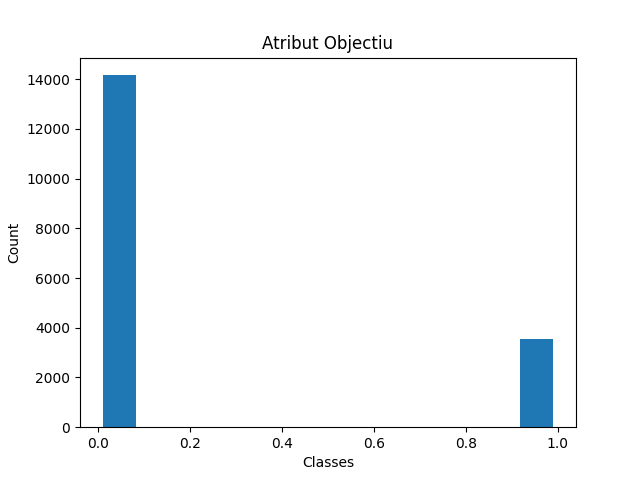

In [11]:
plt.figure()
plt.title("Atribut Objectiu")
plt.xlabel("Classes")
plt.ylabel("Count")
hist = plt.hist(Dataset.values[:,4], bins=11, range=[np.min(Dataset.values[:,4]), np.max(Dataset.values[:,4])], histtype="bar", rwidth=0.8)

<IPython.core.display.Javascript object>


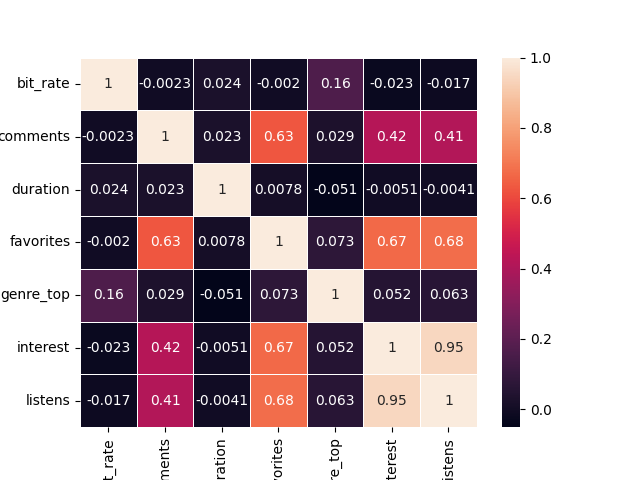

<IPython.core.display.Javascript object>


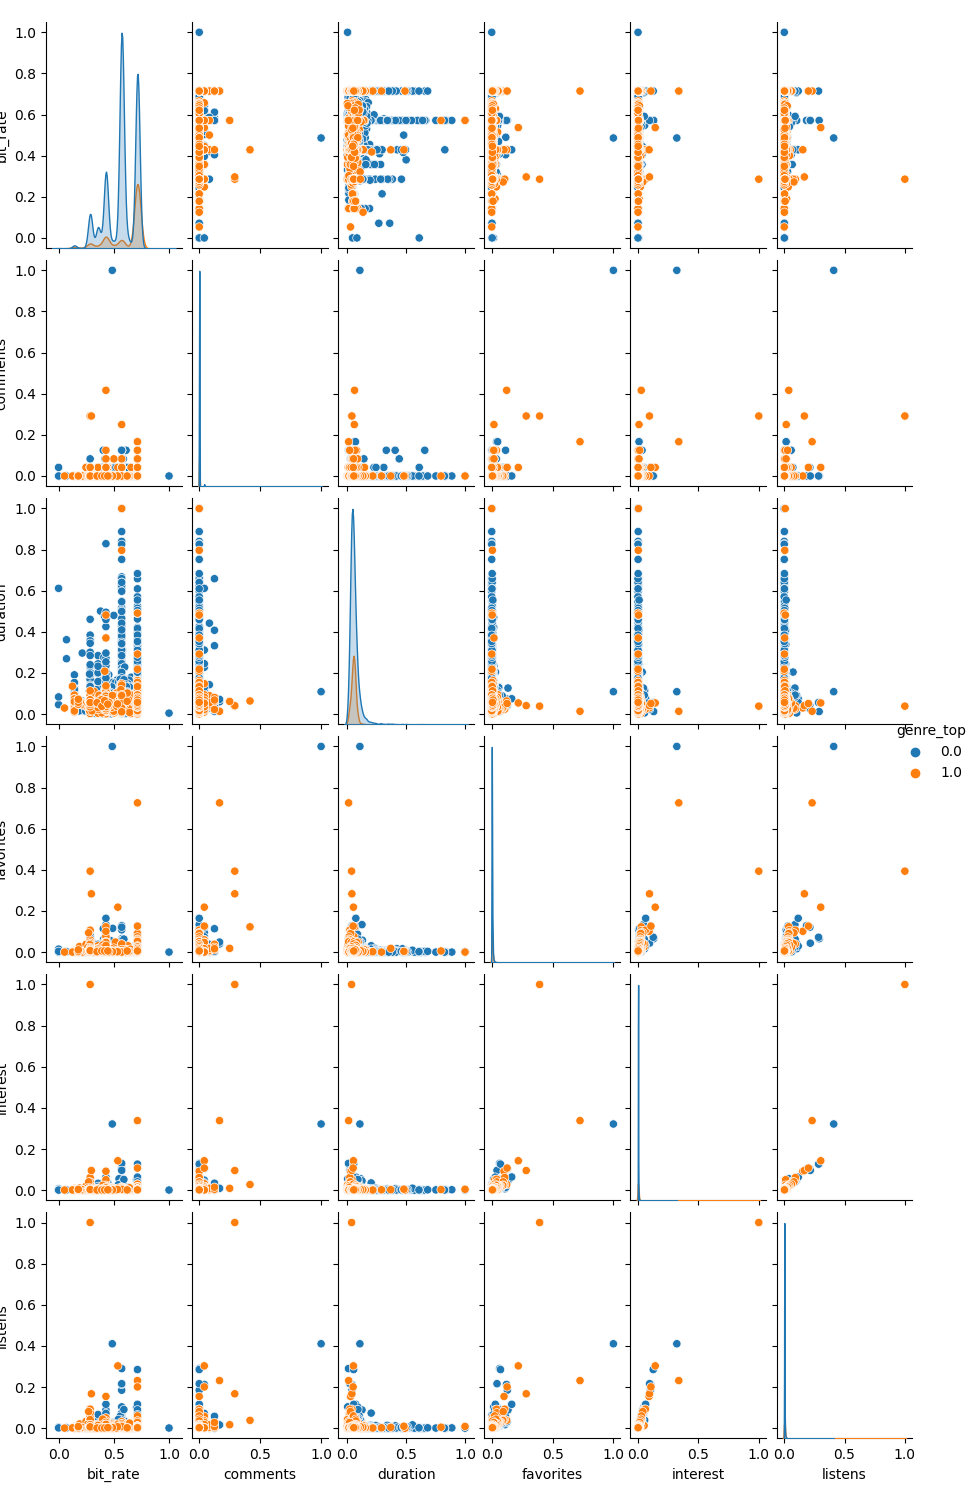

In [12]:
# Mirem la correlació entre els atributs d'entrada i de surtida
correlacio = Dataset.corr()
plt.figure()
ax = sns.heatmap(correlacio, annot=True, linewidths=.5)
relacio = sns.pairplot(normalized_dataset, hue="genre_top")

Observem que hi ha una alta correlació entre els atributs "listens" i "interest". Això ja ens ho esperavem, ja que si el número de reproduccions d'una cançó augmenta, l'interès que se li assigna aquesta cançó, també augmenta.
També passa una cosa similar amb els "comments" i els "favorites", ja que si t'agrada una canso, la comentes i li dónes 'like'.

Però al mirrar si hi ha alguna correlació entre els atributs numèrics i l'atribut objectiu, no apareix res realment significatiu.
Dels atributs numèrics, el que ens dóna més informació, és el de "bit_rate", ja que ens dóna el número de BPM. Això te logica, ja que el Hip-Hop acostuma a utilitzar uns BPM entre els 60 i els 120, cosa que el Rock no té tan marcat. Però com el número de cançons de Rock forme el 80% de les dades, pot ser que ens provoqui aquesta poca correlació entre BPM i Hip-Hop.
Així que balancegarem el número de cançons de cada classe.

(Per balancejar les dades podríem utilitzar totes les dades i assignar-li un pes major a les de classe 'Hop-Hop', però com el cost de temps computacional per generar les gràfiques i els models que farem més endavant és bastant alt, utilitzarem un altre forme que és seleccionar el mateix número de cançons de cada classe, i així balanceja'm i també reduïm la càrrega computacional.)

Tot hi això si no aconseguim ningun resultat, també podem mirar els atributs "genres" i "genres_all", ja que ens indican, en quin tipus de disc/àlbum està i els gèneres musicals que té associat. Però abans també haurem d'adaptar el nostre dataset, ja que estan en format strting.

Dimensionalitat de la BBDD: (7104, 7)


<IPython.core.display.Javascript object>


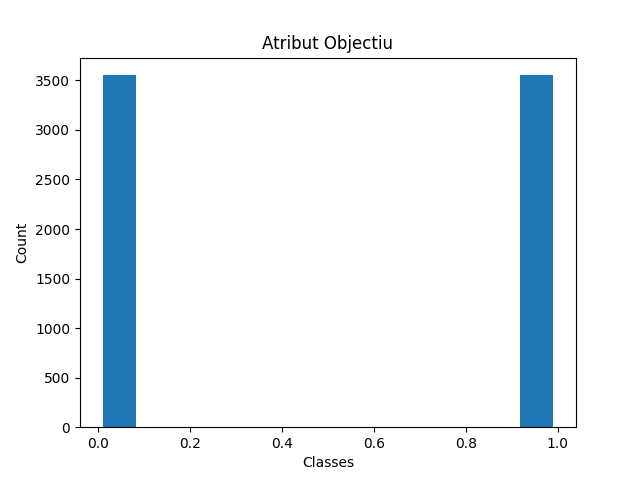

In [12]:
DatasetBalanced = Dataset.groupby('genre_top')
DatasetBalanced = pd.DataFrame(DatasetBalanced.apply(lambda x: x.sample(DatasetBalanced.size().min()).reset_index(drop=True)))

print("Dimensionalitat de la BBDD:", DatasetBalanced.shape)

plt.figure()
plt.title("Atribut Objectiu")
plt.xlabel("Classes")
plt.ylabel("Count")
hist = plt.hist(DatasetBalanced.values[:,4], bins=11, range=[np.min(DatasetBalanced.values[:,4]), np.max(DatasetBalanced.values[:,4])], histtype="bar", rwidth=0.8)

<IPython.core.display.Javascript object>


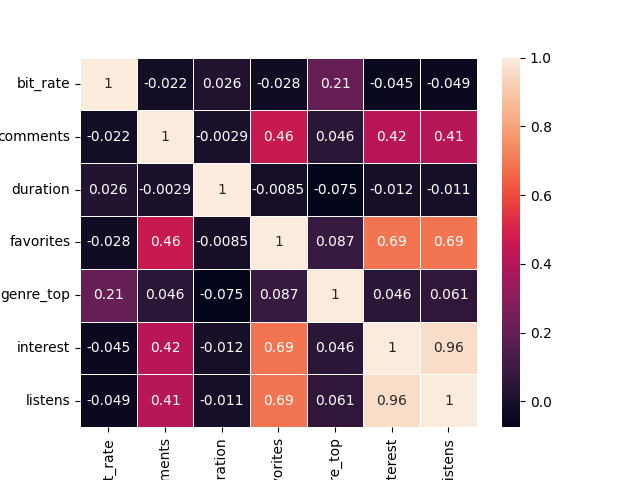

In [13]:
correlacio = DatasetBalanced.corr()
plt.figure()
ax = sns.heatmap(correlacio, annot=True, linewidths=.5)


Un cop balancejats el número de valors de cada classe, observem que la correlació entre els BPM (bit_range) a augmentat, però no tant com esperàvem, per tant, la nostra hipòtesi de poder classificar la música segons unicament el seu BPM no semble que pugui funcionar.

### Selecció d'atributs

Intentarem generar la classificació utilitzant també els atributs **genres** i **genres_all**, però abans haurem de tractar les dades, ja que, com ja hem dit, les dades estan en format String. A sobre no sabem quina de les ID utilitzades, dintre d'aquests atributs, fan referència al genera osubgenera de Rock i de Hip-Hop i per finalitzar una cançó pot tindre més d'una ID referenciada a un gènera.

In [14]:
#Creem una còpia per tindre el Dataset, per utilitzar-lo més endavant
NewDataset = dataset.copy(deep=False)
#Recuperem el dataset que guarde les variables de 'genres' i 'genres_all' i el balancegem 
DatasetBalanced = dataset.groupby('genre_top')
DatasetBalanced = pd.DataFrame(DatasetBalanced.apply(lambda x: x.sample(DatasetBalanced.size().min()).reset_index(drop=True)))
#Cambiem el valor de "Rock" per 0 i el valor de "Hip-Hop" per 1
DatasetBalanced.loc[DatasetBalanced['genre_top'] == "Rock", 'genre_top'] = 0
DatasetBalanced.loc[DatasetBalanced['genre_top'] == "Hip-Hop", 'genre_top'] = 1
DatasetBalanced = DatasetBalanced.astype({"genre_top": int})
print("Dimensionalitat de la BBDD:", DatasetBalanced.shape)

Dimensionalitat de la BBDD: (7104, 9)


Per començar utilitzarem una tècnica per seleccionar el primer gènera que tenen assignades cadascuna dels atributs anomenats anteriorment.

Llegirem el primer valor del String, l'aïllarem i el passarem a Int. Això ho farem amb la funció "selectFirst", i ho aplicarem tant a l'atribut **genres** com el **genres_all**.

In [15]:
def selectFirst(value):
    #print(value)
    if ',' in value:
        indice_coma = value.index(',')
        subcadena = value[1:indice_coma]
    else:
        subcadena = value[1:len(value)-1]
    return int(subcadena)
DatasetBalanced['genres'] = DatasetBalanced['genres'].apply(selectFirst)
DatasetBalanced['genres_all'] = DatasetBalanced['genres_all'].apply(selectFirst)
#Fem una còpia del Dataset per utilitzaria mes endavant
LatestDataset = DatasetBalanced.copy(deep=False)

In [16]:
DatasetBalanced.head() 

bit_rate  comments  duration  favorites  genre_top  genres  \
genre_top                                                                 
Hip-Hop   0    320000         0       229          2          1      21   
          1    320000         1       248         12          1      21   
          2    320000         0       187          1          1      21   
          3    256000         0       190          2          1      21   
          4    256000         0       344          0          1      21   

             genres_all  interest  listens  
genre_top                                   
Hip-Hop   0          21       524      366  
          1          21      4429     3201  
          2          21       117       62  
          3         100      3980     1659  
          4          21      1301      195

<IPython.core.display.Javascript object>


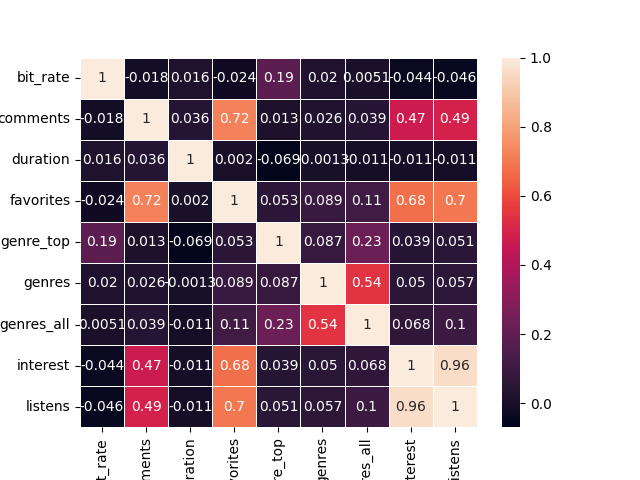

In [17]:
correlacio = DatasetBalanced.corr()
plt.figure()
ax = sns.heatmap(correlacio, annot=True, linewidths=.5)
#relacio = sns.pairplot(DatasetBalanced)

Com observem, amb l'atribut **genres_all** tenim una correlació amb l'atribut objectiu encara més alta que amb el dels BPM i també observem que hi ha una alta correlació entre l'atribut **genres_all** i **genres**

Començarem combinant els atributs amb una major correlació amb l'atribut objectiu per intentar generar una classificació.

Aquests atributs són; **genres_all** i **bit_rate**.

Però més endavant veurem els resultats de combinar els atributs **genres_all** i **genres**

In [18]:
#Eliminem els atributs no desitjats i deixem els  necessaris i l'atribut objectiu.
DatasetBalanced = DatasetBalanced.drop(columns=['comments'])
DatasetBalanced = DatasetBalanced.drop(columns=['duration'])
DatasetBalanced = DatasetBalanced.drop(columns=['favorites'])
DatasetBalanced = DatasetBalanced.drop(columns=['genres'])
DatasetBalanced = DatasetBalanced.drop(columns=['interest'])
DatasetBalanced = DatasetBalanced.drop(columns=['listens'])

print("Dimensionalitat de la BBDD:", DatasetBalanced.shape)
DatasetBalanced.head() 

Dimensionalitat de la BBDD: (7104, 3)


bit_rate  genre_top  genres_all
genre_top                                   
Hip-Hop   0    320000          1          21
          1    320000          1          21
          2    320000          1          21
          3    256000          1         100
          4    256000          1          21

In [19]:
#Modifiquem l'ordre dels atributs per tindre l'atribut objectiu al principi, per major comoditat
cols = DatasetBalanced.columns.tolist()
cols = cols[-1:] + cols[:-1]
cols = cols[-1:] + cols[:-1]
DatasetBalanced = DatasetBalanced[cols] 

#normalized_dataset=(DatasetBalanced-DatasetBalanced.min())/(DatasetBalanced.max()-DatasetBalanced.min())

DatasetBalanced.head() 

genre_top  genres_all  bit_rate
genre_top                                   
Hip-Hop   0          1          21    320000
          1          1          21    320000
          2          1          21    320000
          3          1         100    256000
          4          1          21    256000

**Alerta**: Assegurat de què l'atribut "genre_top" està el primer, per poder segui executant el codi sense inconvenients

## Anàlisis de models de Classificació
Ara que ja tenim el nostre Dataset només amb els atributs que volem, provarem de gènera unes classificacions Logística i SVM amb diferents conjunts d'aprenentatge i test per veure el tant per cent de classificació correcte que podem obtenir amb aquests mètodes.

(El mètode SVM, l'utilitzarem amb el tipus de kernel 'rpf')

In [20]:
def standarize(x_train):
    mean = x_train.mean(0)
    std = x_train.std(0)
    x_t = x_train - mean[None, :]
    x_t /= std[None, :]
    return x_t


data = DatasetBalanced.values
x = data[:, 1:]
y = data[:, 0]

#Normalitzem les dades
X = standarize(x)

particions = [0.5, 0.7, 0.8]


for part in particions:
    x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part)
    
    #Creem el regresor logístic
    logireg = LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001)

    # l'entrenem
    logireg.fit(x_t, y_t)

    print ("Correct classification Logistic ", part, "% of the data: ", logireg.score(x_v, y_v))
    
    #Creem el regresor logístic
    svc = svm.SVC(C=10.0, kernel='rbf', gamma=0.9, probability=True)

    # l'entrenem 
    svc.fit(x_t, y_t)
    probs = svc.predict_proba(x_v)
    print ("Correct classification SVM      ", part, "% of the data: ", svc.score(x_v, y_v))

Correct classification Logistic  0.5 % of the data:  0.6951013513513513
Correct classification SVM       0.5 % of the data:  0.7629504504504504
Correct classification Logistic  0.7 % of the data:  0.6894934333958724
Correct classification SVM       0.7 % of the data:  0.7664165103189493
Correct classification Logistic  0.8 % of the data:  0.6868402533427164
Correct classification SVM       0.8 % of the data:  0.7586206896551724


Observem que utilitzar els mètodes d'hiperplans, obtenim una millor classificació, aixi que intentarem provar diferents kernels amb el mètode SVM per veure les diferents generacions de classificacions que poden produir i seleccionarem els que ens doni una major taxa de classificació correcte.

In [21]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def show_C_effect(X, y, C=1.0, gamma=0.7, degree=3):

    # we create an instance of SVM and fit out data. We do not scale our
    # data since we want to plot the support vectors
    # title for the plots
    x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part)
    titles = ('SVC with linear kernel',
              'LinearSVC (linear kernel)',
              'SVC with RBF kernel',
              'SVC with polynomial (degree 3) kernel',
              'Logistic Regression')

    #C = 1.0  # SVM regularization parameter
    models = (svm.SVC(kernel='linear', C=C).fit(x_t, y_t),
              svm.LinearSVC(C=C, max_iter=1000000).fit(x_t, y_t),
              svm.SVC(kernel='rbf', gamma=gamma, C=C).fit(x_t, y_t),
              svm.SVC(kernel='poly', degree=degree, gamma='auto', C=C).fit(x_t, y_t),
              LogisticRegression().fit(x_t, y_t))
         
    models = (clf.fit(X, y) for clf in models)

    plt.close('all')
    fig, sub = plt.subplots(3, 2, figsize=(14,9))
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    for clf, title, ax in zip(models, titles, sub.flatten()):
        plot_contours(ax, clf, xx, yy,
                      cmap=plt.cm.coolwarm, alpha=0.8)
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xlabel('genres_all')
        ax.set_ylabel('bit_rate')
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)

    plt.show()
    
def show_C_effect_ensemble(X, y, C=1.0, gamma=0.7, degree=3):

    
    # we create an instance of SVM and fit out data. We do not scale our
    # data since we want to plot the support vectors
    # title for the plots
    x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part)
    titles = ('BaggingClassifier', 
              'GradientBoostingClassifier')
    #C = 1.0  # SVM regularization parameter
    models = (BaggingClassifier(base_estimator=svm.SVC(kernel='rbf', gamma=gamma, C=C)).fit(x_t, y_t), 
              GradientBoostingClassifier().fit(x_t, y_t))
              
    
    models = (clf.fit(X, y) for clf in models)

    plt.close('all')
    fig, sub = plt.subplots(1, 2, figsize=(14,9))
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    for clf, title, ax in zip(models, titles, sub.flatten()):
        plot_contours(ax, clf, xx, yy,
                      cmap=plt.cm.coolwarm, alpha=0.8)
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xlabel('genres_all')
        ax.set_ylabel('bit_rate')
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)

    plt.show()


<IPython.core.display.Javascript object>


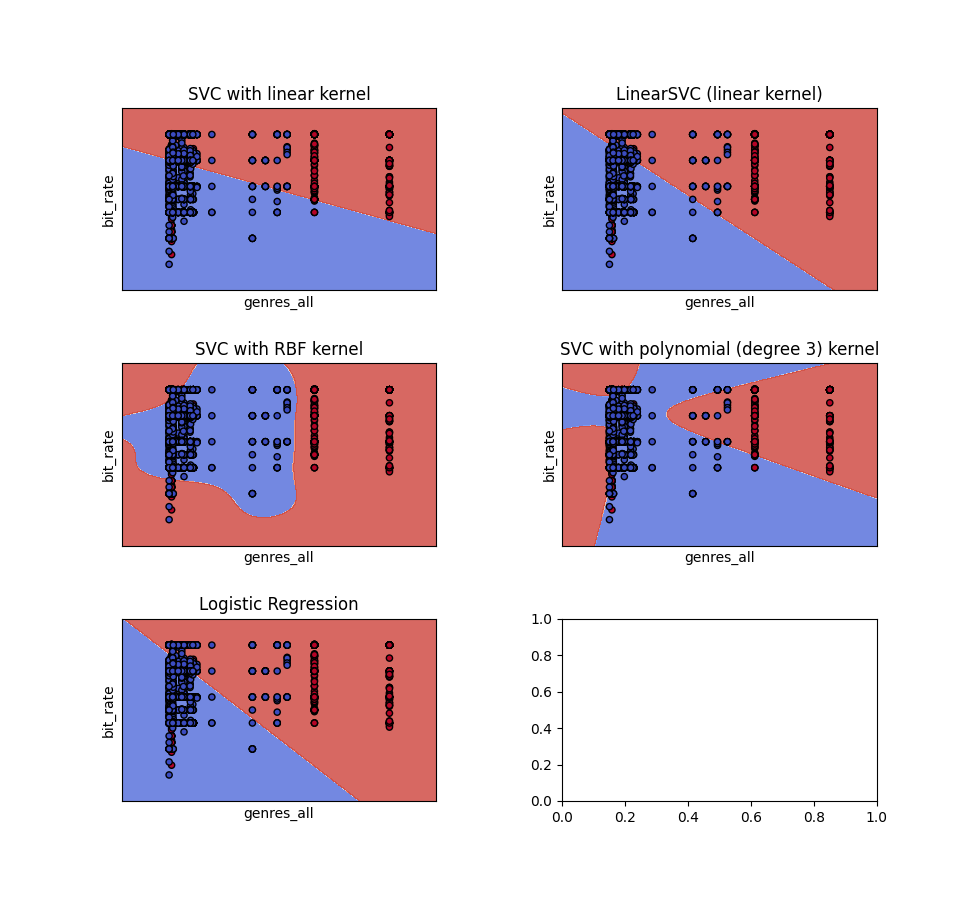

In [23]:
show_C_effect(X=X, y=y, C=0.2)

Com podem veure, les classificacions lineals sembla que no són les més indicades, en canvi les que compten amb una Lambda (Λ) major, ens generen una classificació més encertada. Tot i això i per asseguren-se, també generarem un rànquing amb els mètodes segons el seu radi d'encert amb la classificació.

In [22]:
samp = SMOTE()

X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train, y_train =samp.fit_resample(X_train,y_train)

scale = StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

In [23]:
mod = []
cv_score=[]

model = [svm.SVC(kernel='rbf'),
         svm.SVC(kernel='poly'),
         LogisticRegression(),
         svm.SVC(kernel='linear'),
         svm.LinearSVC()]
for m in model:
    cv_score.append(cross_val_score(m, X_train, y_train, scoring='accuracy', cv=7).mean())
    mod.append(m)
model_df=pd.DataFrame(columns=['model','cv_score'])
model_df['model']=mod
model_df['cv_score']=cv_score
model_df.sort_values(by=['cv_score'], ascending=True).style.background_gradient(subset=['cv_score'])

,model,cv_score
3,SVC(kernel='linear'),0.571845
4,LinearSVC(),0.694437
2,LogisticRegression(),0.695548
1,SVC(kernel='poly'),0.719991
0,SVC(),0.763517


Observan aquesta taula, valem que el mètode de classificació amb una major tassa d'encerts és el SVM amb el kernels de tipus 'rpf', seguit per al SVM amb els kernels de tipus polinomial.
A més a més, veiem que el model de classificació Logística dona millors resultats que els models SVM lineals.

## Beneficis de balancejar les dades
En aquest punt podem dir que podem classificar les cançons segons si són del gènera musical Rock o Hip-hop, amb una precisió del 76,7% i sempre que la quantitat de cançons de cada estil estigui balancejada, però que passaria si intentéssim classificar una llista de cançons on el 80% d'elles són de Rock i el 20% de Hip-hip? (Llista original)

Nosaltres hem suposat que en haver una diferència tan gran entre classes, a l'hora d'intentar generar una classificació, el model classificaria totes les cançons del tipus Rock i això provocaria una tassa de falsos negatius de 20%, obtenint així una classificació amb una tassa d'encerts del 80%. Però realment passaria?

Ara intentarem classificar les 17.000 cançons sense balancejar-les.

(El codi que ve a continuació és el mateix que hem fet per poder generar les classificacions però amb el Dataset complert.)

In [24]:
#Cambiem el valor de "Rock" per 0 i el valor de "Hip-Hop" per 1
NewDataset.loc[NewDataset['genre_top'] == "Rock", 'genre_top'] = 0
NewDataset.loc[NewDataset['genre_top'] == "Hip-Hop", 'genre_top'] = 1
NewDataset = NewDataset.astype({"genre_top": int})
#Passem els String a Int
NewDataset['genres'] = NewDataset['genres'].apply(selectFirst)
NewDataset['genres_all'] = NewDataset['genres_all'].apply(selectFirst)
#Eliminem atributs innecessaris
NewDataset = NewDataset.drop(columns=['comments'])
NewDataset = NewDataset.drop(columns=['duration'])
NewDataset = NewDataset.drop(columns=['favorites'])
NewDataset = NewDataset.drop(columns=['genres'])
NewDataset = NewDataset.drop(columns=['interest'])
NewDataset = NewDataset.drop(columns=['listens'])

In [25]:
 #Modifiquem l'ordre dels atributs per tindre l'atribut objectiu al principi, per major comoditat
cols = NewDataset.columns.tolist()
cols = cols[-1:] + cols[:-1]
cols = cols[-1:] + cols[:-1]
NewDataset = NewDataset[cols] 

#normalized_dataset=(DatasetBalanced-DatasetBalanced.min())/(DatasetBalanced.max()-DatasetBalanced.min())
print("Dimensionalitat de la BBDD:", NewDataset.shape)
NewDataset.head() 

Dimensionalitat de la BBDD: (17714, 3)


,genre_top,genres_all,bit_rate
0,0,58,256000
1,0,58,256000
2,0,25,192000
3,0,25,192000
4,0,26,256000


<IPython.core.display.Javascript object>


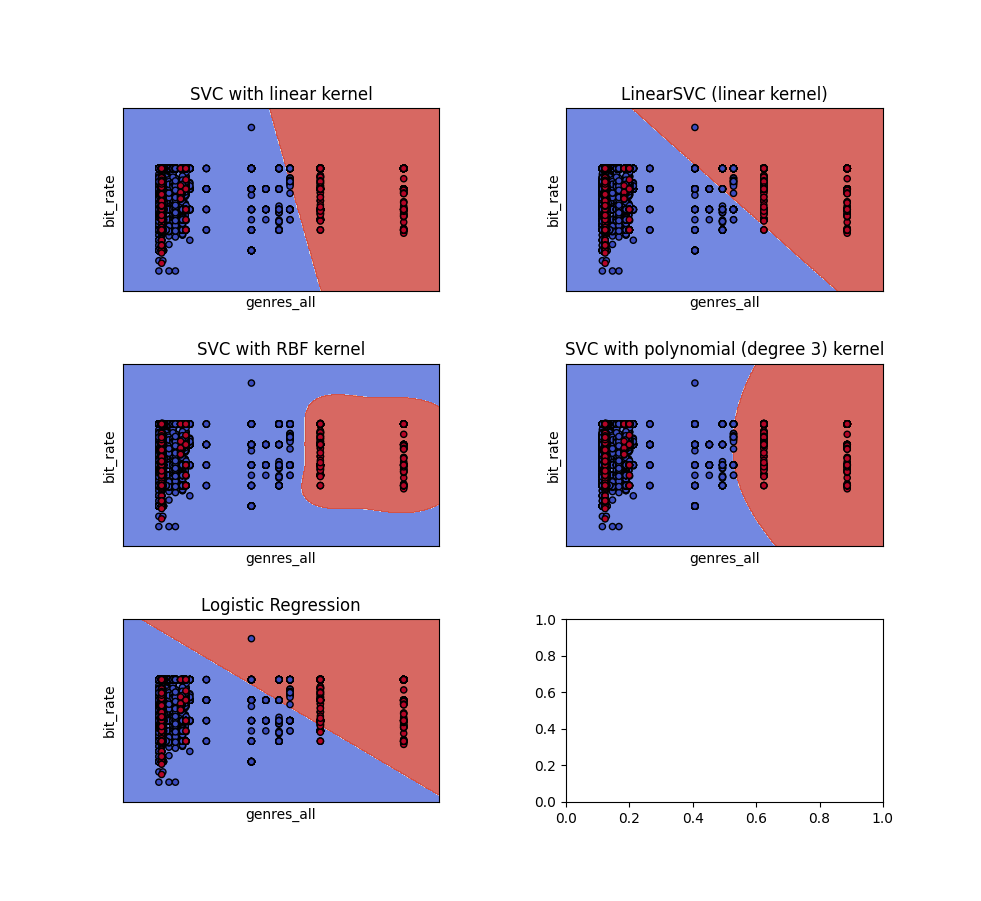

In [26]:
data = NewDataset.values
x = data[:, 1:]
y = data[:, 0]

#Normalitzem les dades
X = standarize(x)

show_C_effect(X=X, y=y, C=0.2)

In [27]:
samp = SMOTE()

X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train, y_train =samp.fit_resample(X_train,y_train)

scale = StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)
mod = []
cv_score=[]

model = [svm.SVC(kernel='rbf'),
         svm.SVC(kernel='poly'),
         LogisticRegression(),
         svm.SVC(kernel='linear'),
         svm.LinearSVC()]
for m in model:
    cv_score.append(cross_val_score(m, X_train, y_train, scoring='accuracy', cv=7).mean())
    mod.append(m)
model_df=pd.DataFrame(columns=['model','cv_score'])
model_df['model']=mod
model_df['cv_score']=cv_score
model_df.sort_values(by=['cv_score'], ascending=True).style.background_gradient(subset=['cv_score'])

,model,cv_score
3,SVC(kernel='linear'),0.574851
4,LinearSVC(),0.700736
2,LogisticRegression(),0.702198
1,SVC(kernel='poly'),0.712951
0,SVC(),0.772286


Observant els resultats veiem que, en utilitzar tot el dataset sense balancejar el nombre de cada classe, obtenim un rati d'encerts amb un 0,6% major que balanceja'n-ho. Si no interpretéssim bé les dades, podríem pensar que això implica que usant el 100% del dataset, podem generem una millor classificació, però realment és així?

El que realment està passant és que el nombre de cançons de Rock ha augmentat tant que el percentatge de falsos negatius en comparació als certs negatius sa descompensat prou per a obviar l'existència de falsos negatius. Si aquest model l'uséssim amb un dataset on la quantitat de cançons de cala classe fos similar, ens donaria una tassa d'èxit pitjor a la que havíem generat amb el model balancejat. Per tant, podem dir que la nostra hipòtesi de balancejar les classes, era certa.

Podem dir que llavors, el model generat anteriorment, és el millor possible quan les dades estan balancejades?
No ho podem assegurar, ja que és possible obtenir una major tassa de classificació utilitzant un mètode diferent de seleccionar els valors de **genres_all**.
També podríem obtenir un millor model, ajustant correctament els atributs de la funció SVM i optimitzant el seu funcionament.

## Mètodes ensemble

També podem provar d'utilitzar models **'ensemble'** per veure si podem generar una bona classificació i sense que ens generi Overfitting.
Per fer-ho utilitzarem el model SVM amb els kernels de tipus 'rpf' amb el metode **BaggingClassifier**, ja que és els que ens generen la millor classificació i així provem si podem optimitzar-ho, però també el compararem amb el mètode **GradientBoostingClassifier** utilitzant el model de Regressió Logística. (Opció per defecte de la fonació GradientBoostingClassifier)

(Com hem vist que balancejar les classes és necessari, tornarem a utilitzar les dades balancejades)

<IPython.core.display.Javascript object>


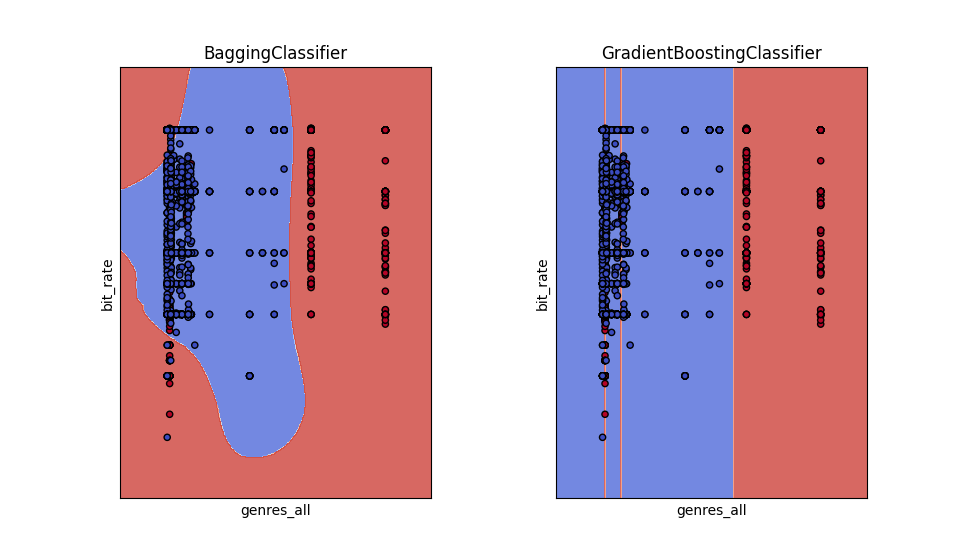

In [28]:
data = DatasetBalanced.values
x = data[:, 1:]
y = data[:, 0]

#Normalitzem les dades
X = standarize(x)

show_C_effect_ensemble(X=X, y=y, C=0.2)

In [29]:
samp = SMOTE()

X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train, y_train =samp.fit_resample(X_train,y_train)

scale = StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)
mod = []
cv_score=[]

model = [BaggingClassifier(base_estimator=svm.SVC(kernel='rbf', gamma=0.7, C=0.2)), 
         GradientBoostingClassifier()]
for m in model:
    cv_score.append(cross_val_score(m, X_train, y_train, scoring='accuracy', cv=7).mean())
    mod.append(m)
model_df=pd.DataFrame(columns=['model','cv_score'])
model_df['model']=mod
model_df['cv_score']=cv_score
model_df.sort_values(by=['cv_score'], ascending=True).style.background_gradient(subset=['cv_score'])

,model,cv_score
0,"BaggingClassifier(base_estimator=SVC(C=0.2, gamma=0.7))",0.753702
1,GradientBoostingClassifier(),0.999815


Veiem que utilitzant el mètode BaggingClassifier amb el model SVC, obtenim uns resultats molt similars als obtinguts utilitzen només SVC. En canvi, a l'utilitzar un mètode ensemble amb el model de Regresio Logistica, observem un canvi dràstic, en la classificació. Veiem que només utilitza l'eix horitzontal per diferenciar entre classes i aconsegueix genera una classificació molt més precisa. Aquest eix horitzontal representa els diferents valors de l'atribut **genres_all**. Això implica que estem sent capaços de classificar per ID de subclasse (subgènere). Però és molt probable que això hagi sorgit per culpa d'un sobre entrenament i que a l'hora d'intentar incorpora noves dades de test, ens acabi donant una tassa d'error superior. 

## Utilització de diferents atributs

Un cop vist això deixarem d'utilitzar l'atribut **bit_rate** que té una correlació baixa amb l'atribut **genres_all** i utilitzarem l'atribut **genres**, que com ja hem vist anteriorment, té una correlació del 56% i mirarem si podem genera una dispersió major de les dades.

In [30]:
LatestDataset

#Eliminem els atributs no desitjats i deixem els  necessaris i l'atribut objectiu.
LatestDataset = LatestDataset.drop(columns=['comments'])
LatestDataset = LatestDataset.drop(columns=['duration'])
LatestDataset = LatestDataset.drop(columns=['favorites'])
LatestDataset = LatestDataset.drop(columns=['bit_rate'])
LatestDataset = LatestDataset.drop(columns=['interest'])
LatestDataset = LatestDataset.drop(columns=['listens'])

print("Dimensionalitat de la BBDD:", LatestDataset.shape)
LatestDataset.head() 


Dimensionalitat de la BBDD: (7104, 3)


genre_top  genres  genres_all
genre_top                                 
Hip-Hop   0          1      21          21
          1          1      21          21
          2          1      21          21
          3          1      21         100
          4          1      21          21

<IPython.core.display.Javascript object>


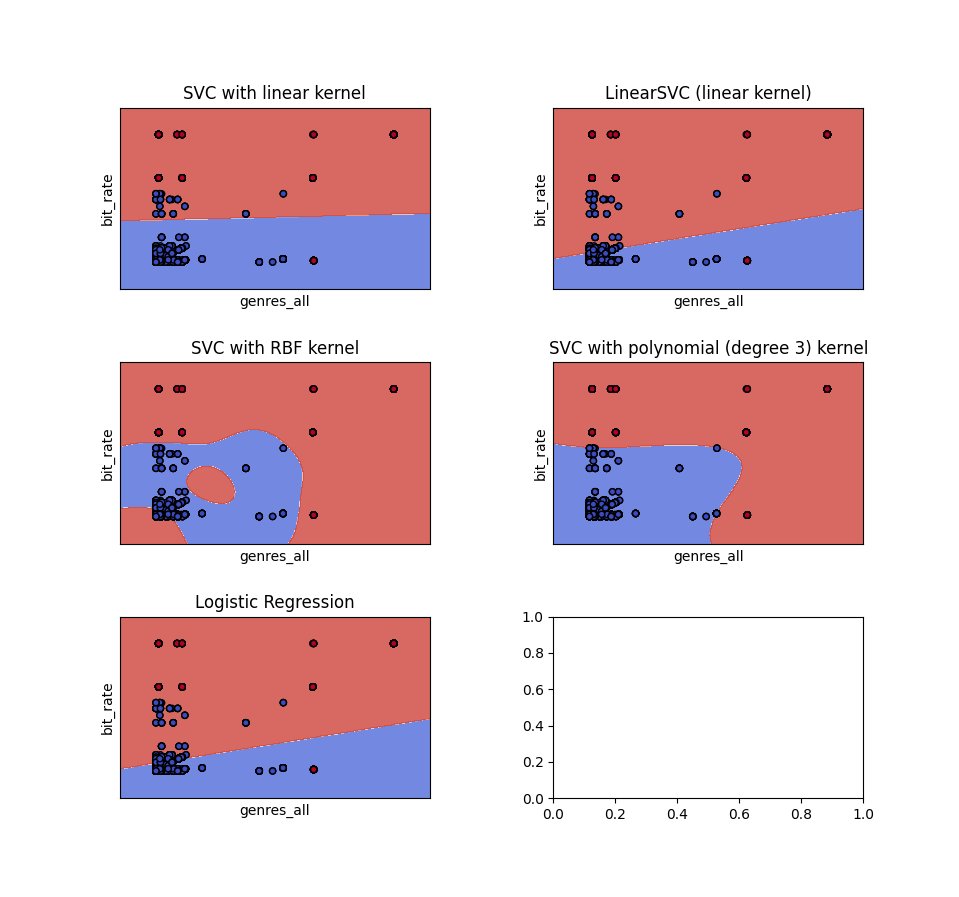

In [31]:
data = LatestDataset.values
x = data[:, 1:]
y = data[:, 0]

#Normalitzem les dades
X = standarize(x)

show_C_effect(X=X, y=y, C=0.2)

In [32]:
samp = SMOTE()

X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train, y_train =samp.fit_resample(X_train,y_train)

scale = StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)
mod = []
cv_score=[]

model = [svm.SVC(kernel='rbf'),
         svm.SVC(kernel='poly'),
         LogisticRegression(),
         svm.SVC(kernel='linear'),
         svm.LinearSVC()]
for m in model:
    cv_score.append(cross_val_score(m, X_train, y_train, scoring='accuracy', cv=7).mean())
    mod.append(m)
model_df=pd.DataFrame(columns=['model','cv_score'])
model_df['model']=mod
model_df['cv_score']=cv_score
model_df.sort_values(by=['cv_score'], ascending=True).style.background_gradient(subset=['cv_score'])

C:\Users\Roger\miniconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Roger\miniconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,model,cv_score
2,LogisticRegression(),0.514809
4,LinearSVC(),0.554625
3,SVC(kernel='linear'),0.567773
1,SVC(kernel='poly'),0.583329
0,SVC(),0.692413


Com podem veure, en comptes de gènera una dispersió de les dades, hem acabat ajuntant la gran part d'elles el que dificulta genera una bona classificació i tot i que podríem utilitzar mètodes ensemble, acabaria donant resultats molt similars als obtinguts amb la selecció d'atributs anteriors.

Per aquest motiu i perquè el temps computacional comença a ser bastant alt, he decidit deixar-ho en aquest punt.

## Conclusions
Hem pogut veure com el balanceja les dades ens serveix per no generar classificacions errònies.

Hem vist també, que els atributs amb major importància són 'genres_all', 'bit_rate' i 'genres'.

També hem sigut capaços de generar una classificació del 76,7% utilitzant els atributs 'genres_all' i 'bit_rate'.

Hem vist que és possible generar classificacions només utilitzant l'atribut 'genres_all', però que té altra probabilitat de ser culpa d'un sobreentrenament de les dades.

I finalment, que podríem segui intenten genera un millor classificador si som capaços d'especificar un segon atribut el qual dispersi les dades més agrupades.